In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from scipy.stats import pearsonr, spearmanr

plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
%matplotlib inline

# Vision Zero - New York's Traffic Fatalities
In [New York](https://www1.nyc.gov/site/visionzero/index.page), motor vehicle crashes are the leading cause of injury related deaths for the residents. Every year, about 4000 people get injured and over 250 New Yorkers are getting killed. On average, a vehicle injures or kills a New Yorker every 2 hours. The large amount of traffic fatalities led to the Vision Zero Program started by Mayor Bill de Blasio in 2014, to cut down traffic related injuries and deaths by 50% in 2025. 
   
In the following years since the program started, the following actions have been made:
    
   - Improving Street Design
        - Implementation of Street Improvement Projects
        - Installation of Leading Pedestrian Intervals (gives pedestrians a head start before vehicles can cross at intersections)
        - Adressing left turns at intersections
        - Building a bike street network
        - Further support the agency camera reinforcement program: increase use of speed camera, bus lane cameras, and red                       light cameras      
   - Increased Reinforcement
        - Drivers are being summoned for violating traffic laws that are the primary cause of collisions (e.g. Speeding,                         Failure to Yield to a Pedestrian, Utilizing a Cell Phone While Driving, and Texting While Driving)
    
Since the implementation of the program, traffic fatalities in the city have continuously decreased for the past 4 years. Where by 2018, the city's traffic fatalities have significantly declined by 28% with a 45% decline in pedestrian accidents (from 184 in 2013 to 101 in 2017). Although the program has vastly improved street safety, there are still a lot of improvements to be done, as the new findings in the report shows the leading cause of fatalities have been increased with the following:
        
   - Speed enforcement increased by 9.2%
   - Texting while driving increased by 36.3%, and
   - Failure to yield to pedestrians increased by 22%

## Assessing Dangerous Driving Habits Of New York Drivers 

The use of Trafic Ticket Issued: Four Year Window data set will be applied to the analysis of driver's behavior in New York. The data set has already been cleaned, wherein all blank cells have been removed and state of license have been filtered out to New York only. Also a feature was added such as, Age Group. The data provided has some bias, since not all violators can be detected by the officers. The data also shows some skewness between age groups and genders. This is because a lot of the time, most people on the road consists of Millenials and the Generation X, and the dataset mainly consists of males (about 80%). 

The study aims to understand the underlying increase of traffic fatalities found by the New York Police Department, which are the following:

   - Speed enforcement increase of 9.2%
   - Texting while driving increase of 36.3%, and
   - Failure to yield to pedestrians increased by 22%

In [2]:
driver_beh = pd.read_csv("driver_behavior.csv")

In [3]:
driver_beh.columns

Index(['Violation Charged Code', 'Violation Description', 'Violation Year',
       'Violation Month', 'Violation Day of Week', 'Age at Violation',
       'Gender', 'State of License', 'Police Agency', 'Court', 'Source',
       'Age Group', 'Season'],
      dtype='object')

In [4]:
#initialize color dictionaries

color_generation = {"Millenial": "lawngreen", "Generation X": "chocolate", "Centennials":"gold", "Baby Boomers": "darkgrey"}
color_gender = {"F": "darkcyan", "M":"darkorange"}

def color_wheel(color_dictionary, df_category):
    return tuple(color_dictionary[i]  for i in df_category)

# Did Driver Behavior Changed?

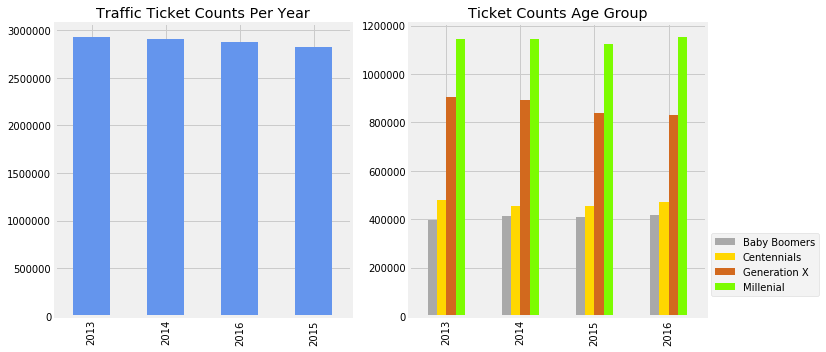

In [5]:
title1 = "Traffic Ticket Counts Per Year"
title2 = "Ticket Counts Age Group"

year_count = pd.crosstab(driver_beh["Violation Year"], driver_beh["Age Group"])

fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 5))

driver_beh["Violation Year"].value_counts().plot(kind = "bar", ax = ax1, color = ("cornflowerblue"), title = title1)
year_count.plot(kind = "bar", ax = ax2, color = color_wheel(color_generation, year_count.columns), title = title2)


fig.tight_layout()
plt.legend(bbox_to_anchor = (1, 0.3))

Since the start of Vision Zero, 2014, there has been a slight decreasing trend which is the result of increased reinforcement. Another reason for the decerase of traffic violations are from the Generation X, because they are the only age group where traffic tickets have been in a decline, one explanation for this is that a lot of them are becoming senior citizens and are more [careful](https://www.telegraph.co.uk/motoring/road-safety/7092869/Driving-skills-are-older-drivers-better-than-young-ones.html) with their driving as compared to the younger generation.

Millenials in all years have been consistently on the top, so let's check on the most dangerous drivers on the road.

# Who Are The Most Dangerous Drivers?

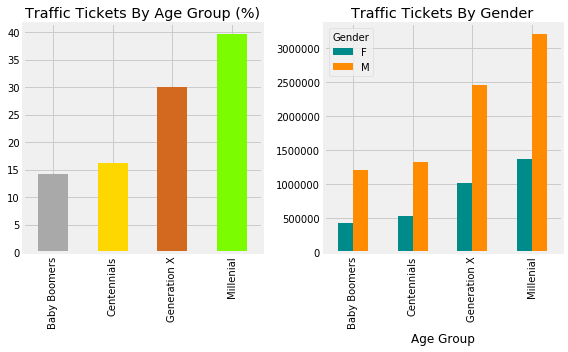

In [48]:
percentage_generation = (driver_beh["Age Group"].value_counts(normalize = True) *100).sort_values()
trafficcount_gender = pd.crosstab(driver_beh["Age Group"], driver_beh["Gender"])

title1 = "Traffic Tickets By Age Group (%)"
title2 = "Traffic Tickets By Gender"

#graph
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (8, 5))

percentage_generation.plot(kind ="bar", ax = ax1, color = list(color_wheel(color_generation, percentage_generation.index)), title = title1)
trafficcount_gender.plot(kind = "bar", ax = ax2, color = color_wheel(color_gender, trafficcount_gender.columns), title = title2)

fig.tight_layout()

Getting a driver's license among [teens and young adults is decreasing](https://www.theatlantic.com/technology/archive/2016/01/the-decline-of-the-drivers-license/425169/), which explains the high traffic violations among millenials due to inexperience and the low traffic count violations among centennials since not a lot of them are getting their license. Another reason for high traffic ticket counts among millenials, assuming they just got their license, is the [low passing rate during their basic road exam](http://www.nydailynews.com/new-york/city-fail-road-test-2012-article-1.1367690). The article states that reasons that only less than 50% of the test takers passed the road exam is because of:

   - Schools taking out their driver's education program, more of them are relying on their relatives for training
   - Relatives who can barely drive are teaching them
    
The reliance and imitation of bad driving habits, are then passed on to the road which causes dangerous driving.

Another thing to point out in this, is the dominance of risky driving from men as compared to females. A [Norwegian study](http://www.dailymail.co.uk/sciencetech/article-5092299/Women-NOT-bad-drivers-men-problem.html), which made tests of over 1100 high school students and 440 from the general population, have resulted that young men as well as extroverted and neurotic people are the more likely to be distracted. While women are generally safer drivers, since they are more likely to be considerate, and be more cautious when approaching a hazard.

Considering that millenials are the most dangerous drivers on the road, it leads to the next question "What are the most common violations?"

# What Are The Most Common Violations?

In [24]:
# color dictionary for common violation
color_violation = {'SPEED IN ZONE 11-30': "chartreuse", 'SPEED IN ZONE': "lime", 'SPEED OVER 55 ZONE': "mediumspringgreen", 
                  'FLD TO STOP AT STOP SIGN': "salmon", 'DISOBEYED TRAFFIC DEVICE': "tomato", 
                  'OPERATING MV MOBILE PHONE': "gold",
                  'SIDEWINGS/SIDEWINDOWS/NON/TRANSPARENT': "chocolate",
                  'OPERATING W/O INSURANCE': "blueviolet",
                  'UNLICENSED OPERATOR': "mediumorchid", 'UNINSPECTED MOTOR VEHICLE': "plum"}

Text(0.5,0.98,'Top 10 Common Traffic Ticket Violations')

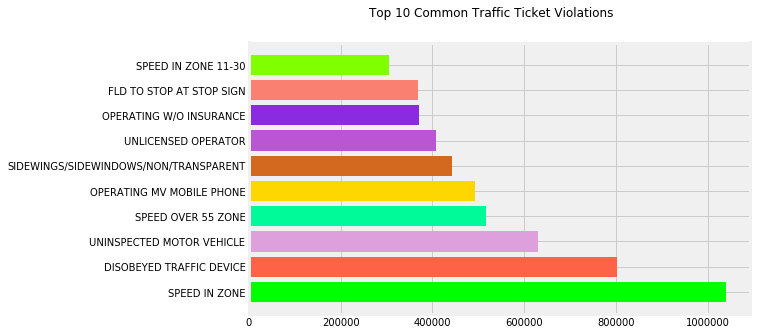

In [25]:
common_violations = driver_beh["Violation Description"].value_counts().head(10).sort_values(ascending = False)

y = np.arange(len(common_violations))
x = [common_violations[i] for i in range(len(common_violations))]

fig, ax = plt.subplots(figsize = (8, 5))

ax.barh(y, x, color = color_wheel(color_violation, common_violations.index))
ax.set_yticks(y)
ax.set_yticklabels(common_violations.index.tolist())

fig.suptitle("Top 10 Common Traffic Ticket Violations")

In [ ]:
spearman = spearmanr(time_analysis.unstack()["SPEED IN ZONE"].values, time_analysis.unstack()["DISOBEYED TRAFFIC DEVICE"].values)[0]

#print("Spearman correlation between speeding and disboyeing a traffic device is: {:.2f}".format(spearman))

Over 1 1520 746 kinds of violations have been ticketed, and the top 10 have consisted over ~50%. It is clear here that speeding is the main problem among drivers, where there are 3 kinds of violations (speed in zone 11-30, speed over 55 zone, and speed in zone). Moreover, there may be some relation between disobeying traffic devices and speeding, since 5 of these violations are under 2 larger violations which are: disobeying traffic markers and speeding. Upon using a spearman correlation, a statistical test that checks the correlation between two features, shows a high relation between disobeying traffic markers and speeding, a score of 0.8 out of 1.

By looking these violations by their gender and age groups can give us a better insight. The only violations that will be placed on the succeeding graphs are traffic tickets related to speeding, disobeying traffic devices, and distracted driving since these are the reasons of the increase in traffic fatality.

In [26]:
#top 10 common violations dataframe
top3_causes = ['SPEED IN ZONE', 'SPEED OVER 55 ZONE', 'SPEED IN ZONE 11-30',
               'DISOBEYED TRAFFIC DEVICE', 'FLD TO STOP AT STOP SIGN', 
               'OPERATING MV MOBILE PHONE']
top3_common = driver_beh[driver_beh["Violation Description"].isin(top3_causes)]

Text(0.5,0.98,'Traffic Violations By Gender and Age Groups (%)')

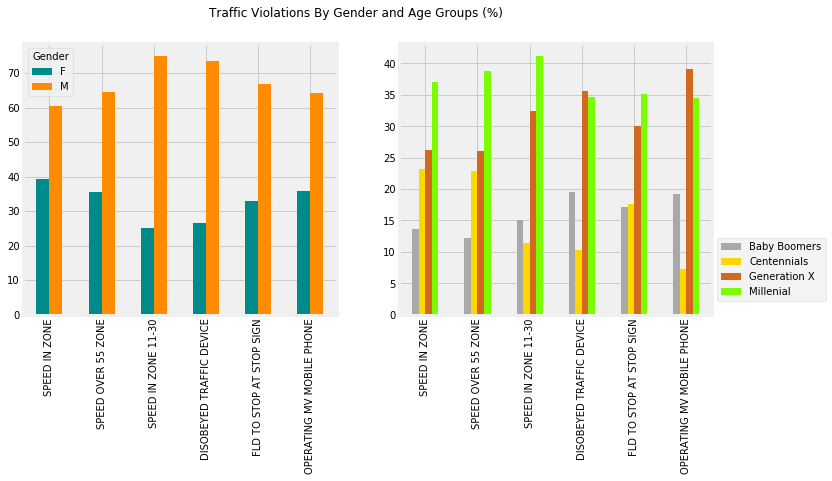

In [27]:
common_gender = pd.crosstab(top3_common["Violation Description"], top3_common["Gender"]).apply(lambda x: x/x.sum() *100, axis = 1)
common_generation = pd.crosstab(top3_common["Violation Description"], top3_common["Age Group"]).apply(lambda x: x/x.sum() *100, axis = 1)

fig, (ax1, ax2) = plt.subplots(ncols =2, nrows =1, figsize = (11, 5))

common_gender.loc[top3_causes].plot(kind = "bar", ax = ax1, color = color_wheel(color_gender, common_gender.columns))
common_generation.loc[top3_causes].plot(kind = "bar", ax = ax2, color = color_wheel(color_generation, common_generation.columns))

for axis in [ax1, ax2]:
    axis.set_xlabel("")

ax2.legend(bbox_to_anchor = (1, 0.3))
fig.suptitle("Traffic Violations By Gender and Age Groups (%)")

A [AAA study](http://www.mcall.com/news/nationworld/pennsylvania/mc-distracted-driving-millennial-report-20170216-story.html) has reported that young millenials, aged 19-24, are 1.6 times more likely to read a text while driving and twice more when sending a text. Although the graph (right) shows otherwise, more generation X have been ticketed than millenials, this further strengthens the observations made on the last figure that drivers not getting caught using cellphones while driving, have made a habit on using phones more often. 

The same study also detailed that nearly 12% of millenials told that it is okay to exceed the speed limit of over 10mph, which complements really well on the graph as they have contributed to over ~45% of the tickets in speeding related tickets.


Knowing this, let's find out if speeding tickets and cellphone by time. 

Text(0,0.5,'Ticket Count')

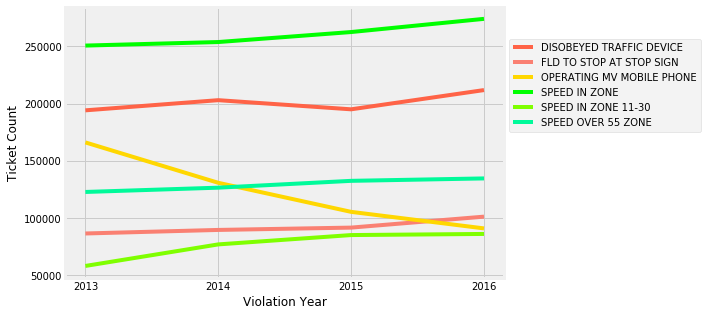

In [28]:
time_analysis = pd.crosstab(top3_common["Violation Year"], top3_common["Violation Description"])

year_xticks = [2013, 2014, 2015, 2016]

fig, ax = plt.subplots(figsize = (7, 5))

time_analysis.plot(kind = "line", color = color_wheel(color_violation, time_analysis.columns), ax = ax, xticks = year_xticks, lw = 4)

#fig.suptitle("Number of Traffic Tickets (2013 - 2016)")
ax.legend(bbox_to_anchor = (1, 0.9))
ax.set_ylabel("Ticket Count")

The decreasing trend in capturing drivers using cellphones, could be one of the causes of the increase of traffic fatalities related to texting while driving. One reason for this increase is the difficulty of police capturing drivers using cellphones, changed driver behavior wherein they get to practice a habit of using cellphones while driving as, suggested in this [study](https://www.researchgate.net/publication/234088373_Influence_of_traffic_enforcement_on_the_attitudes_and_behavior_of_drivers). 

A [survey](http://www.mcall.com/news/breaking/ct-dangerous-drivers-20170215-story.html), made by the AAA has reported that over 23% of the drivers think that it is acceptable to go over 15mph on a freeway, which could be one of the reasons for high speeding traffic ticket count. However, both traffic violations (disobeying traffic device and speeding in zone), have similar behaviors wherein both are consistently ranked high and shows an upward trend. This suggests a few possibilities:
        
   - Ineffective markers
   - Distracted driving, or
   - Driver complacency

These two variables could be the reasons for the increase of traffic fatalities due to speeding and failure to yield to pedestrians. 

# What's Next?

Millenials have been the most dangerous drivers in the road, and have been consistently for the 4 recorded years. Also the high relation between speeding as well as disobeying traffic devices which could have caused the increase of traffic related injuries due to failure to yield to pedestrians and speeding. With that said, the possible causes for traffic accidents could be one or a combination of these variables: ineffective traffic devices, driver complacency, and distracted driving.

Here is the proposed solutions to help minimize traffic fatalities:
    
 ### Educating Drivers
      
   - Knowing that most of the ticket counts come from millenials, and in the succeeding years an increase for centennials, the driver's license exam should be improved. Researching the safest roads on earth, the [article](https://www.autoguide.com/auto-news/2016/11/top-10-countries-with-the-safest-roads.html) showed that UK is the 3rd safest with only 3 people getting killed per 100 000. Futhermore, a [story](https://www.theguardian.com/commentisfree/2013/dec/02/uk-driving-law-versus-us) about a student who both got a license in the US and in the UK, who basically said that getting a license in the UK is basically haveing a PHD in driving.

    So finding key differences in both the New York and UK driving license exam, the key difference is:
    
       - Having a hazard perception test, wherein an applicant should be able to identify 15 hazards ina a series of short video clips, the faster a person identifies a hazard the higher the score.
       
  One thing also worth noting is that there should be proper requirements on all the teachers who are supposed to teach all the people who are getting their license to get proper driving etiquette as well as confidence. 
       
### Improving Street Safety
       
   - Decreasing trends on finding drivers using cellphones while driving suggests the difficulty of capturing one. Newly installed [AI cameras](https://www.thesun.co.uk/motors/6208964/worlds-first-camera-to-catch-drivers-using-mobile-phones-is-here-and-it-could-be-coming-to-the-uk/), where it identifies drivers that uses cellphones while driving, in Australia showed to have captured over 400 distracted drivers in 12 hours. Lastly, just last year, the UK made a change in penalties regarding distracted which heavily penalizes them, from 150 pounds and 3 points to 200 pounds and 6 points (you only get 12 points maximum). Over the course of the year, distracted driving has significantly decreased of over 47%. The use of this AI camera can be highly advatageous to capture offenders who use cellphones while driving.